#### Objective:
To explore the Uber Drives of 2016 - Individual Customer
#### Dataset:
https://drive.google.com/file/d/1Oab_ydEfENrXIaOoXu8JMwICyNkXX1GO/view?usp=sharing

## Step 1 Reading the dataframe

In [1]:
#importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading the data
data = pd.read_csv(r'C:\Users\Rishabh Gupta\Downloads\Uber_Drives_2016.csv')

In [3]:
print("There are {} features and {} datapoints in the given data.".format(data.shape[1],data.shape[0]))

There are 7 features and 1156 datapoints in the given data.


In [4]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

### Understanding the columns of the data:
The details of the Uber drives are given in the data:

START AND END DATE : Date of starting and ending ride  

Category of ride (purpose): Whether the ride for businessor personal purpose.

Start and ending states: from where the ride started and to where it ended.

Distances covered: Miles taken by each ride.

Purpose: Particular purpose of the ride such as meeting, commute and so on.

In [5]:
#look at the first few rows
data.head(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
#at the last few rows
data.tail(5)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


The given data is of 2016 Uber drives all the world. 

The last row in the data is for total of miles which should be removed from the data. In columns like start and stop , null values are entered as Unknown location. We need to change that too.

## Step 2 : data cleaning

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Except miles, all other columns are in object type(that is string and others). If we observe that the start_date and end_date 
which should be datetime type but are given in object dtype. So, we need to correct the dtypes of them. Moreover ,* at the end of each string does not seem nice. So, we will also remove them.

There are also missing values for columns: start , stop and purpose 

In [8]:
#getting rid of * from each column head
#use of lambda function (an anonymous function )
y = lambda x: x.replace('*','')
data.columns = data.columns.map(y)

In [9]:
#removing the row of the data
data.drop(1155,axis=0,inplace=True)

In [10]:
#coverting the dtype of start and end_date columns
data['START_DATE'] = pd.to_datetime(data['START_DATE'],format = "%m/%d/%Y %H:%M")
data['END_DATE'] = pd.to_datetime(data['END_DATE'],format = "%m/%d/%Y %H:%M")

In [11]:
#converting unknownlocation into the null values
data['START'].replace("Unknown Location",np.NAN,inplace=True)
data['STOP'].replace("Unknown Location",np.NAN,inplace=True)

In [12]:
#information about the new columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1007 non-null   object        
 4   STOP        1006 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


## Step 3: Data Analysis

Data Analysis is about asking questions about the data. So, we will look at the answers of the following questions:

1) % of categories of each

2) Difference between start and end_date: we will get the number of hours travelled.

3) Number of Rides When start and stop place are the same.

4) Number of trips hourly distribution.

5) Miles distribution

6) Monthly distribution  of rides.

7) Distribution of rides with respect to  weekdays  vs weekend.

8) Purpose distribution for the whole number of rides
 
9) Purposes for top 3 stops

10) average travel for each purpose

11) top 5 routes

12) Median speed of the drivers

Text(0.5, 1.0, 'Business Vs Personal Rides ')

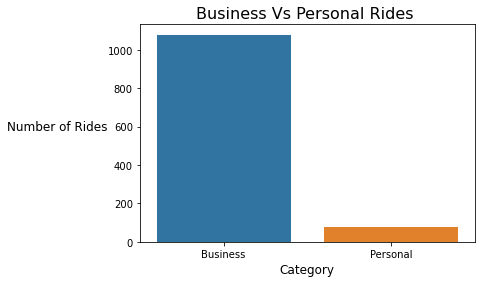

In [13]:
#1 percentage of categories of each
sns.countplot(x= 'CATEGORY',data=data)
plt.xlabel("Category",fontsize=12)
plt.ylabel("Number of Rides",fontsize=12,rotation=0,labelpad=50)
plt.title("Business Vs Personal Rides ",fontsize=16)

Business rides were about 93 percent(1050/1155) while personal rides were only 7 percent of total . So, There is a massive difference between two types of categories.

In [14]:
# number of minutes travalled
minutes =[]
data['minutes'] = data['END_DATE'] -data['START_DATE']
for x in data['minutes']:
    # seconds divide by 60 will give number of minutes travelled
    minutes.append(x.seconds / 60)
data['minutes'] =minutes

Text(0.5, 1.0, 'Distribution of minutes rides')

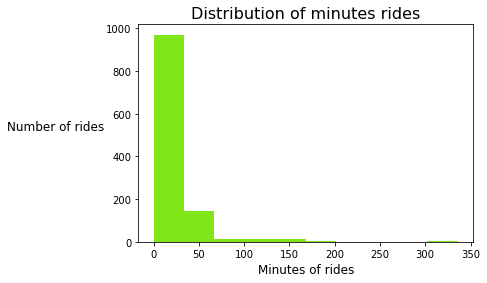

In [15]:
#2 distribution of minutes
plt.hist(data['minutes'],color =(0.5,0.9,0.1))
plt.xlabel("Minutes of rides",fontsize=12)
plt.ylabel("Number of rides",fontsize=12,rotation=0,labelpad=50)
plt.title("Distribution of minutes rides",fontsize=16)

Most of the travellers took rides of less than 25 minutes. So, the nature of most rides were short-term.

In [16]:
#3 Same place
len(data[data['START']  == data['STOP']]) /len(data)

0.1748917748917749

In about 18 percent of the rides, travellers travelled within the same place. This implies that most of the rides (about 82 percent) were inter-place.

Text(0.5, 1.0, 'Number of trips on hourly basis')

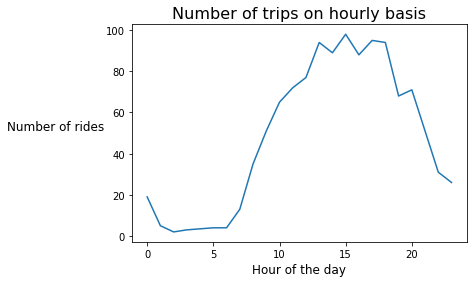

In [17]:
#4 Number of trips on hourly basis
#getting the hour column of each ride
data['Hour'] = pd.DatetimeIndex(data['START_DATE']).hour
#using groupby to combine the results in an hour basis
data.groupby(data['Hour']).size().plot(kind='line')
plt.xlabel("Hour of the day",fontsize=12)
plt.ylabel("Number of rides",fontsize=12,rotation=0,labelpad=50)
plt.title("Number of trips on hourly basis",fontsize=16)

Trips were quite low at the beginning of the day. However, as the day progresses , the number of trips increases .especially between 10 to 18 time period (that is 10 AM to 6 PM )  After this, trips fall sharply. This is quite obvious as most of the trips were for business category which tends to be at peak between 10 to 18 hours.

Text(0.5, 1.0, 'Distribution of Miles')

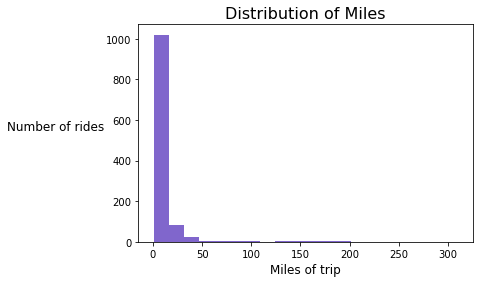

In [18]:
#5 Miles distribution 
plt.hist(data['MILES'],color = (0.5,0.4,0.8),bins =20)
plt.xlabel("Miles of trip",fontsize=12,rotation =0)
plt.ylabel("Number of rides",fontsize=12,rotation=0,labelpad=50)
plt.title("Distribution of Miles",fontsize=16)

Maximum of rides were between 0 and 17.5 miles (about 1000 of 1150 , 87 percent). In addition, trips become lesser and lesser with the increase in miles of the trip.

Text(0.5, 1.0, 'Monthly Distribution of Rides')

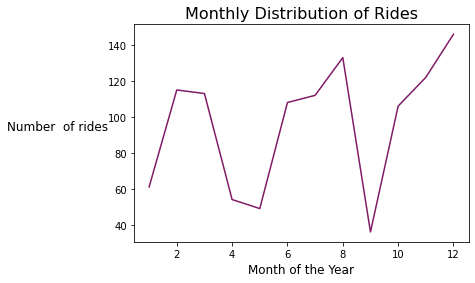

In [19]:
#6 Monthly rides
data['month'] = pd.DatetimeIndex(data['START_DATE']).month
data.groupby('month').size().plot(kind='line',color=(0.5,0.1,0.4))
plt.xlabel("Month of the Year",fontsize=12)
plt.xticks(rotation =0)
plt.ylabel("Number  of rides",fontsize=12,rotation=0,labelpad=50)
plt.title("Monthly Distribution of Rides",fontsize=16)

In the 9th month (september), the number of trips were lowest. However, after this month, the trips have begun increasing it attains its peak in the 12th month.

Text(0.5, 1.0, 'Weekly Distribution of Rides')

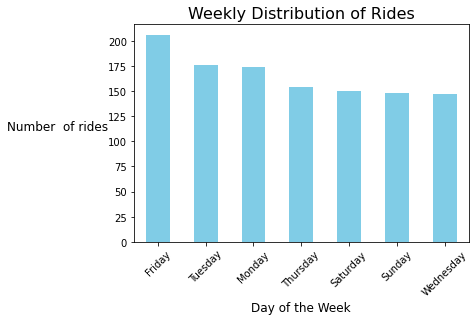

In [20]:
#7 weekdays  vs weekend
data['week'] = pd.DatetimeIndex(data['START_DATE']).weekday
# 0 stands for monday, 1 for tuesday and so on. For better understanding , we will use the following mapping
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
}
data['week'] = data['week'].map(dw_mapping)
data['week'].value_counts().plot(kind='bar',color=(0.5,0.8,0.9))
plt.xlabel("Day of the Week",fontsize=12)
plt.xticks(rotation =45)
plt.ylabel("Number  of rides",fontsize=12,rotation=0,labelpad=50)
plt.title("Weekly Distribution of Rides",fontsize=16)

There are more trips either on the beginning of the working days (that is monday and tuesday) or end of the working days(friday). This is quite expected as business meeting and other business purposes are often at the starting or end time.

Text(0.5, 1.0, 'Distribution of Rides with Purpose')

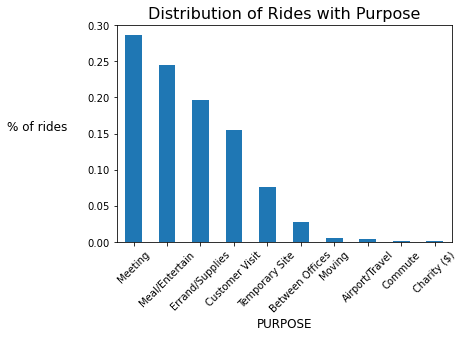

In [21]:
#8 purpose distribution 
data['PURPOSE'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation =45)
plt.xlabel("PURPOSE",fontsize=12)
plt.ylabel("% of rides",fontsize=12,rotation=0,labelpad=50)
plt.title("Distribution of Rides with Purpose",fontsize=16)

Top 3 purposes for rides : Meeting , meal/entertain, and errand/supplies. (About 75 percent of the rides)

In [22]:
data['STOP'].value_counts()[:3]
# these are top 3 stops , that is final destination of the riders.

Cary           203
Morrisville     84
Whitebridge     65
Name: STOP, dtype: int64

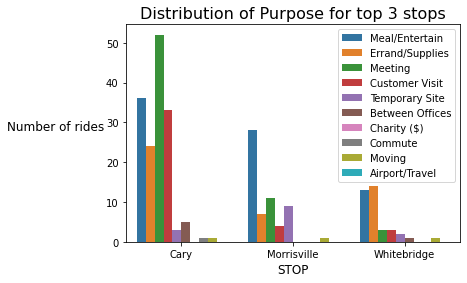

In [23]:
#9 Purposes for top 3 stops
ord = ['Cary','Morrisville','Whitebridge']
sns.countplot(x='STOP',data=data,order = ord ,hue='PURPOSE')
plt.xlabel("STOP",fontsize=12)
plt.ylabel("Number of rides",fontsize=12,rotation=0,labelpad=50)
plt.title("Distribution of Purpose for top 3 stops",fontsize=16)
plt.legend(loc='best')

The top 3 stops are cary, morrisville, and whitebridge. It is noted theat the meal/entertain is the most used purposes for travelling to these stops. Besides, In cary, "customer visit" purpose is comparatively higher than that of the rest two stops.

Text(0.5, 1.0, 'Average travel for each purpose')

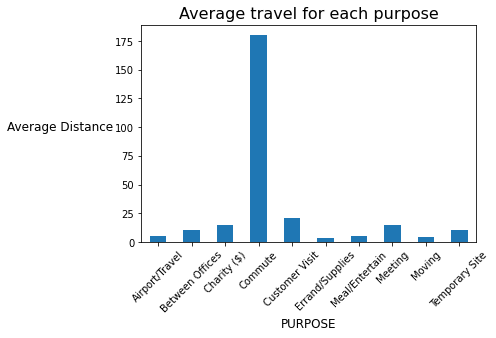

In [24]:
#10 average travel for each purpose
data.groupby('PURPOSE')['MILES'].mean().plot(kind='bar')
plt.xlabel("PURPOSE",fontsize=12)
plt.ylabel("Average Distance",fontsize=12,rotation=0,labelpad=55)
plt.xticks(rotation=45)
plt.title("Average travel for each purpose", fontsize=16)

Mostly people travel long distance (abut 175 miles) for Commute purpose on average. While for others, it is very less much less than 25 miles (or less than 14 percent of average distance travelled for commute).

Text(0.5, 1.0, 'Routes with highest frequency')

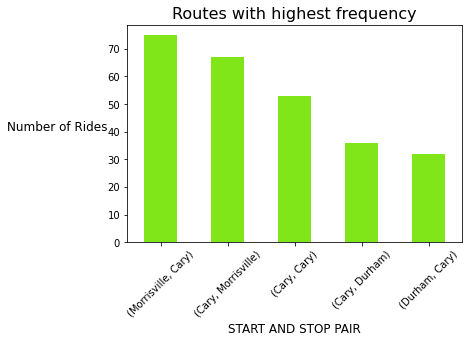

In [25]:
#11 top 5 routes
data.groupby(['START','STOP']).size().sort_values(ascending=False)[:5].plot(kind='bar',color=(0.5,0.9,0.1))
plt.xlabel("START AND STOP PAIR",fontsize=12)
plt.xticks(rotation =45)
plt.ylabel("Number of Rides",fontsize=12,rotation=0,labelpad=50)
plt.title("Routes with highest frequency",fontsize=16)

The top 5 routes are between the three places: MOrrisville, Cary and Dirham.(About 20 percent of all)

####  Computing average speed of the ride: distance/ time:

we know the duration of rides in minutes and distance in miles . So ,we will first convert the time in hours and then divide with distance to get the average speed.

In [26]:
#12 Median speed
data['duration_hour'] = data['minutes']/60
data['Speed'] = data['MILES']/ data['duration_hour']
print("The median speed of the drivers is {} miles per hour".format(data['Speed'].median()))

The median speed of the drivers is 21.0 miles per hour


## Step 4 Conclusion:
The above analysis of Uber drives of 2016 helps in answering the desired questions:

1) % of categories of each : Business with 93 percent of rides while rest were for personal category.

2) Difference between start and end_date: Minutes travelled founded it very less , mostly in the range of 0 to 25 minutes

3) Number of Rides When start and stop place are the same:  18 percent of the rides.

4) Number of trips hourly distribution: Most of rides were between 10 to 18 hours.

5) Miles distribution: About 87 percent of rides was for a distance less than 17.5 miles.

6) Monthly distribution  of rides. Rides were lowest in september , but after which it increased sharpy 

7) Distribution of rides with respect to  weekdays  vs weekend. More frequency of rides were for either beginning or end of working days.

8) Purpose distribution for the whole number of rides :About 75 percent of rides were for Meeting , meal/entertain, and errand/supplies.
 
9) Purposes for top 3 stops : cary, morrisville, and whitebridge were top 3 stops with most common purpose of meal/entertain.

10) Average travel for each purpose : Commute had the largest average travel of 175 miles.While others are even less than 15 percent of this.

11) Top 5 routes: About 20 percent of rides were between either of MOrrisville, Cary and Dirham.

12) Median speed of the drivers : 21 miles per hour